In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
train_path = '../../input/train.csv'
test_path = '../../input/test.csv'
question_path = '../../input/question.csv'
char_embed = "../../input/char_embed.txt"
word_embed = "../../input/word_embed.txt"

In [2]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
question_df = pd.read_csv(question_path)
word_embed_df = pd.read_csv(word_embed,delim_whitespace=True,index_col=0,header=None)
char_embed_df = pd.read_csv(char_embed,delim_whitespace=True,index_col=0,header=None)

In [3]:
question_df["word_len"] = question_df["words"].apply(lambda words:len(words.split(" ")))
question_df["char_len"] = question_df["chars"].apply(lambda chars:len(chars.split(" ")))

In [4]:
question_df.head(20)

,qid,words,chars,word_len,char_len
0,Q000000,W05733 W05284 W09158 W14968 W07863,L1128 L1861 L2218 L1796 L1055 L0847 L2927,5,7
1,Q000001,W17378 W17534 W03249 W01490 W18802,L2214 L1980 L0156 L1554 L2218 L1861 L3019 L010...,5,9
2,Q000002,W17378 W08158 W20171 W11246 W14759,L2214 L2350 L2568 L1969 L2168 L0694 L3012 L256...,5,9
3,Q000003,W11385 W14103 W02556 W13157 W09749,L0762 L2172 L1971 L2034 L2039 L2271 L1346 L223...,5,9
4,Q000004,W17508 W18238 W02952 W18103,L0018 L2321 L1346 L3019 L0104 L0902 L0354 L0362,4,8
5,Q000005,W17378 W12908 W19355 W08410 W11922 W14496 W20487,L2214 L1331 L0016 L1132 L2237 L1900 L0578 L195...,7,14
6,Q000006,W04346 W17378 W06112 W05733 W18238 W05284 W118...,L2323 L1526 L2214 L0358 L1849 L1128 L1861 L301...,8,13
7,Q000007,W16696 W02556 W16564 W03914 W18103,L0366 L2028 L2034 L2039 L0605 L1824 L2292 L015...,5,9
8,Q000008,W17378 W11385 W18238 W13157 W12244 W16319 W18448,L2214 L0762 L2172 L3019 L0104 L2271 L1346 L014...,7,11
9,Q000009,W14113 W16319 W18399 W03472 W11399 W07863 W18103,L0947 L2323 L2582 L0143 L2600 L2272 L1872 L123...,7,10


In [5]:
print "We have in total %s questions!"%question_df.shape[0]

We have in total 728428 questions!


#### Let us look at the distribution of word_len

In [6]:
question_df["word_len"].describe()

count    728428.000000
mean          6.199064
std           2.567069
min           1.000000
25%           4.000000
50%           6.000000
75%           7.000000
max          39.000000
Name: word_len, dtype: float64

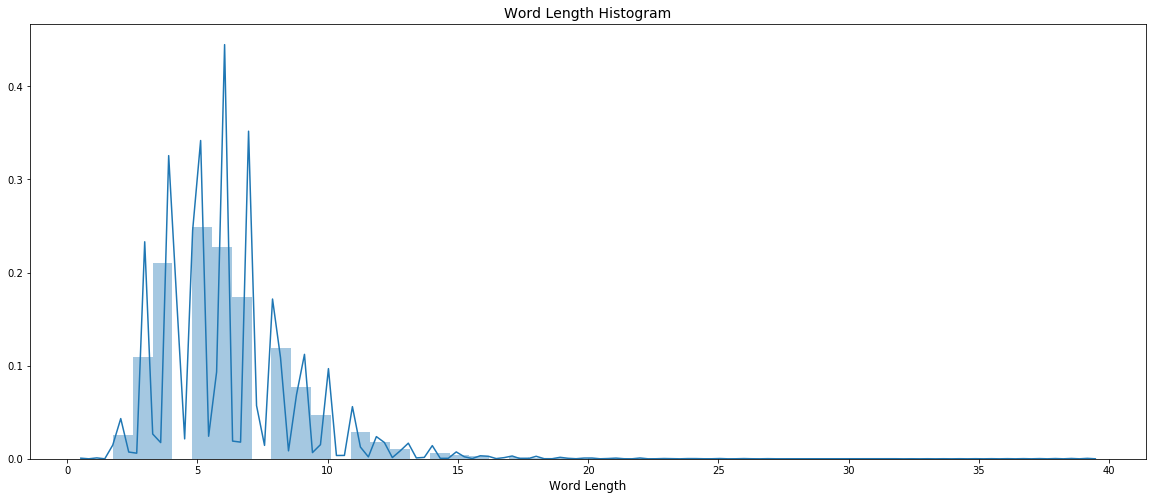

In [7]:
plt.figure(figsize=(20,8))
sns.distplot(question_df["word_len"])
plt.xlabel('Word Length', fontsize=12)
plt.title("Word Length Histogram", fontsize=14)
plt.show()

#### Let us look at the distribution of char_len

In [8]:
question_df["char_len"].describe()

count    728428.000000
mean         10.292577
std           3.918596
min           2.000000
25%           8.000000
50%          10.000000
75%          12.000000
max          58.000000
Name: char_len, dtype: float64

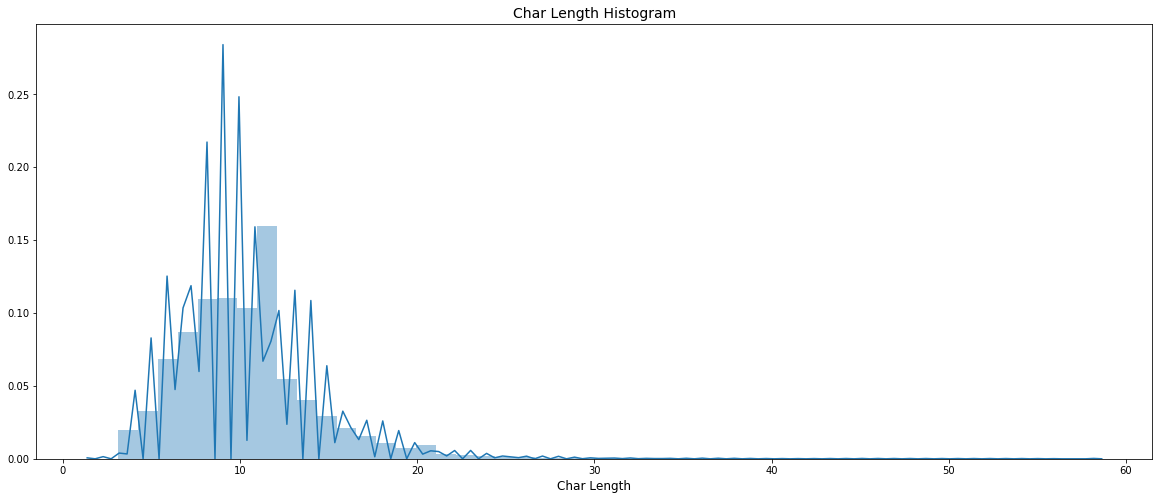

In [9]:
plt.figure(figsize=(20,8))
sns.distplot(question_df["char_len"])
plt.xlabel('Char Length', fontsize=12)
plt.title("Char Length Histogram", fontsize=14)
plt.show()

#### how many unique words and chars in all questions

In [10]:
all_words = question_df["words"].values.tolist()
all_words = ' '.join(all_words)
all_unique_words = set(all_words.split(" "))
print "number of unique words in all questions is %s"%(len(all_unique_words))

number of unique words in all questions is 20890


In [11]:
word_embed_df.shape[0]
## total unique words: 20891

20891

In [12]:
all_unique_words_index = map(lambda x:int(x[1:]),all_unique_words)
for i in range(20891):
    if i not in all_unique_words_index:
        print i
## word W03790 is not in the questions

3790


In [13]:
all_chars = question_df["chars"].values.tolist()
all_chars = ' '.join(all_chars)
all_unique_chars = set(all_chars.split(" "))
print "number of unique chars in all questions is %s"%(len(all_unique_chars))

number of unique chars in all questions is 3048


In [14]:
char_embed_df.shape[0]
## all letters(chars) occur in the questions

3048

#### how many unique questions in train and test set

#### train set

In [15]:
train_df.head(5)

,label,q1,q2
0,1,Q397345,Q538594
1,0,Q193805,Q699273
2,0,Q085471,Q676160
3,0,Q189314,Q438123
4,0,Q267714,Q290126


In [16]:
train_df.shape[0]
## We have totally 254,386 train pairs, and 508772 questions in train set

254386

In [17]:
train_all_qids = pd.concat([train_df["q1"],train_df["q2"]],ignore_index=True)
print "number of questions in train set:%s" % train_all_qids.shape[0]

number of questions in train set:508772


In [18]:
train_ques_fre = train_all_qids.value_counts()
print "number of unique questions in train set:%s, out of %s, ratio is:%.2f%%"%(train_ques_fre.shape[0],question_df.shape[0],
                                                                              100*train_ques_fre.shape[0]/float(question_df.shape[0]))

number of unique questions in train set:192633, out of 728428, ratio is:26.45%


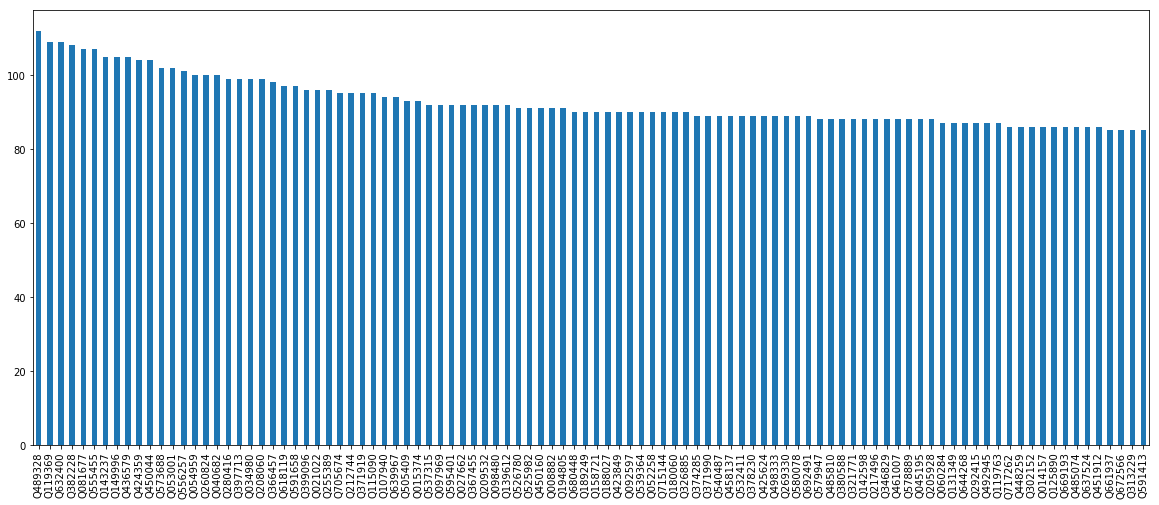

In [19]:
plt.figure(figsize=(20,8))
train_ques_fre.head(100).plot("bar")

In [20]:
train_ques_fre.describe()

count    192633.000000
mean          2.641147
std           6.092427
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         112.000000
dtype: float64

### test set

In [21]:
test_df.shape[0]
## ## We have totally 172,956 test pairs, and 345,912 questions in test set

172956

In [22]:
test_all_qids = pd.concat([test_df["q1"],test_df["q2"]],ignore_index=True)
print "number of questions in test set:%s" % test_all_qids.shape[0]

number of questions in test set:345912


In [23]:
test_ques_fre = test_all_qids.value_counts()
print "number of unique questions in test set:%s, out of %s, ratio is:%.2f%%"%(test_ques_fre.shape[0],question_df.shape[0],
                                                                              100*test_ques_fre.shape[0]/float(question_df.shape[0]))

number of unique questions in test set:248773, out of 728428, ratio is:34.15%


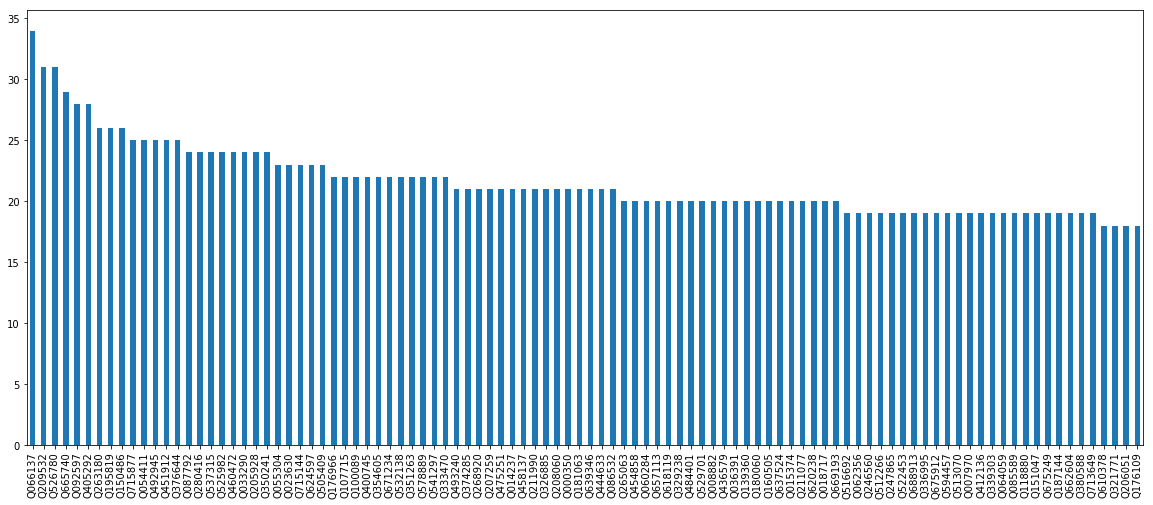

In [24]:
plt.figure(figsize=(20,8))
test_ques_fre.head(100).plot("bar")

In [25]:
test_ques_fre.describe()
## Some questions appear in the test set more often than others

count    248773.000000
mean          1.390472
std           1.192269
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          34.000000
dtype: float64

#### consider train and test together


In [26]:
all_qids = pd.concat([train_all_qids,test_all_qids],ignore_index=True)
print "cnt of all questions in train and test :%s"%len(all_qids)
assert len(all_qids)==len(train_all_qids)+len(test_all_qids)

cnt of all questions in train and test :854684


In [27]:
all_ques_fre = all_qids.value_counts()
print "number of unique questions in train and test set:%s, out of %s, ratio is:%.2f%%"%(all_ques_fre.shape[0],question_df.shape[0],
                                                                              100*all_ques_fre.shape[0]/float(question_df.shape[0]))

number of unique questions in train and test set:406591, out of 728428, ratio is:55.82%


In [28]:
overlap_train_test = set(train_all_qids.values.tolist()).intersection(set(test_all_qids.values.tolist()))
print "number of overlapped unique question between train and test:%s"%(len(overlap_train_test))
print "occupy train %.2f%%, occupy test %.2f%%"%(100*len(overlap_train_test)/len(train_ques_fre),100*len(overlap_train_test)/len(test_ques_fre))

number of overlapped unique question between train and test:34815
occupy train 18.00%, occupy test 13.00%


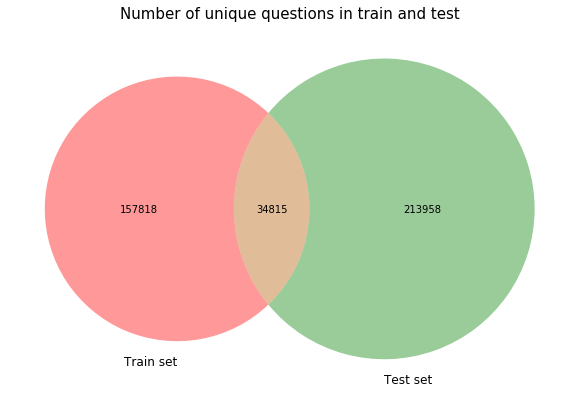

In [29]:
from matplotlib_venn import venn2
plt.figure(figsize=(10,7))
venn2([set(train_all_qids.values.tolist()), set(test_all_qids.values.tolist())], set_labels = ('Train set', 'Test set') )
plt.title("Number of unique questions in train and test", fontsize=15)
plt.show()

#### Now check the label distribution

In [30]:
train_df.head(5)

,label,q1,q2
0,1,Q397345,Q538594
1,0,Q193805,Q699273
2,0,Q085471,Q676160
3,0,Q189314,Q438123
4,0,Q267714,Q290126


In [31]:
label_cnt = pd.DataFrame(train_df["label"].value_counts())
label_cnt.columns = ["count"]
label_cnt["total"] = train_df.shape[0]*1.0
label_cnt["ratio"] = label_cnt["count"]/label_cnt["total"]
print label_cnt
## positive and negative samples are balanced

    count     total     ratio
1  132054  254386.0  0.519109
0  122332  254386.0  0.480891


## Feature engineering test

### tf_idf

In [32]:
question_df

,qid,words,chars,word_len,char_len
0,Q000000,W05733 W05284 W09158 W14968 W07863,L1128 L1861 L2218 L1796 L1055 L0847 L2927,5,7
1,Q000001,W17378 W17534 W03249 W01490 W18802,L2214 L1980 L0156 L1554 L2218 L1861 L3019 L010...,5,9
2,Q000002,W17378 W08158 W20171 W11246 W14759,L2214 L2350 L2568 L1969 L2168 L0694 L3012 L256...,5,9
3,Q000003,W11385 W14103 W02556 W13157 W09749,L0762 L2172 L1971 L2034 L2039 L2271 L1346 L223...,5,9
4,Q000004,W17508 W18238 W02952 W18103,L0018 L2321 L1346 L3019 L0104 L0902 L0354 L0362,4,8
5,Q000005,W17378 W12908 W19355 W08410 W11922 W14496 W20487,L2214 L1331 L0016 L1132 L2237 L1900 L0578 L195...,7,14
6,Q000006,W04346 W17378 W06112 W05733 W18238 W05284 W118...,L2323 L1526 L2214 L0358 L1849 L1128 L1861 L301...,8,13
7,Q000007,W16696 W02556 W16564 W03914 W18103,L0366 L2028 L2034 L2039 L0605 L1824 L2292 L015...,5,9
8,Q000008,W17378 W11385 W18238 W13157 W12244 W16319 W18448,L2214 L0762 L2172 L3019 L0104 L2271 L1346 L014...,7,11
9,Q000009,W14113 W16319 W18399 W03472 W11399 W07863 W18103,L0947 L2323 L2582 L0143 L2600 L2272 L1872 L123...,7,10


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
word_corpus = question_df["words"]
char_corpus = question_df["chars"]

In [34]:
word_corpus.head(5)

0    W05733 W05284 W09158 W14968 W07863
1    W17378 W17534 W03249 W01490 W18802
2    W17378 W08158 W20171 W11246 W14759
3    W11385 W14103 W02556 W13157 W09749
4           W17508 W18238 W02952 W18103
Name: words, dtype: object

In [35]:
word_vectorizer = TfidfVectorizer()
char_vectorizer = TfidfVectorizer()
word_tdmatrix = word_vectorizer.fit_transform(word_corpus)
char_tdmatrix = char_vectorizer.fit_transform(char_corpus)

In [36]:
word_vectorizer2g = TfidfVectorizer(ngram_range=(1,2))

word_tdmatrix2g = word_vectorizer2g.fit_transform(word_corpus)


In [50]:
word_vectorizer2g.vocabulary_

{u'w00722 w13522': 7034,
 u'w08411 w07863': 100841,
 u'w13679 w10157': 166060,
 u'w00564 w15042': 5681,
 u'w17534 w20578': 217257,
 u'w08190 w01214': 96275,
 u'w04381 w02115': 52157,
 u'w18435 w08348': 231392,
 u'w01484 w12327': 16181,
 u'w04864 w01222': 58375,
 u'w05943 w08957': 72804,
 u'w04631 w18103': 56396,
 u'w09158 w11104': 112808,
 u'w11385 w08410': 140574,
 u'w01490 w13887': 17127,
 u'w18482 w13239': 232744,
 u'w17057 w06266': 207122,
 u'w00750 w18802': 8171,
 u'w19227 w00726': 241750,
 u'w08407 w18238': 100243,
 u'w19318 w05490': 243283,
 u'w04965 w01652': 60554,
 u'w11647 w14075': 144780,
 u'w04476 w05957': 53820,
 u'w04259 w19682': 50350,
 u'w17118 w10548': 209763,
 u'w11677 w17508': 145509,
 u'w08977 w16730': 110551,
 u'w01898 w19445': 22866,
 u'w17500 w18238': 215787,
 u'w04163 w08942': 48428,
 u'w18246 w07863': 229174,
 u'w11569 w05055': 143808,
 u'w08924 w16128': 109533,
 u'w05733 w06524': 69589,
 u'w04580 w02252': 55500,
 u'w11441': 141943,
 u'w11440': 141941,
 u'w1144

In [85]:
word_tdmatrix

<728428x20890 sparse matrix of type '<type 'numpy.float64'>'
	with 4387595 stored elements in Compressed Sparse Row format>

In [38]:
char_tdmatrix.shape

(728428, 3048)

In [41]:
word_vectorizer.vocabulary_

{u'w06735': 6734,
 u'w01558': 1558,
 u'w01559': 1559,
 u'w01556': 1556,
 u'w01557': 1557,
 u'w01554': 1554,
 u'w01555': 1555,
 u'w01552': 1552,
 u'w01553': 1553,
 u'w01550': 1550,
 u'w01551': 1551,
 u'w17928': 17927,
 u'w17929': 17928,
 u'w17920': 17919,
 u'w01008': 1008,
 u'w17922': 17921,
 u'w17923': 17922,
 u'w17924': 17923,
 u'w17925': 17924,
 u'w17926': 17925,
 u'w07920': 7919,
 u'w19607': 19606,
 u'w19606': 19605,
 u'w19605': 19604,
 u'w19604': 19603,
 u'w19603': 19602,
 u'w19602': 19601,
 u'w19601': 19600,
 u'w19600': 19599,
 u'w08784': 8783,
 u'w08785': 8784,
 u'w08786': 8785,
 u'w08787': 8786,
 u'w08780': 8779,
 u'w08781': 8780,
 u'w19609': 19608,
 u'w19608': 19607,
 u'w07929': 7928,
 u'w07928': 7927,
 u'w11441': 11440,
 u'w11440': 11439,
 u'w11443': 11442,
 u'w11442': 11441,
 u'w11445': 11444,
 u'w11444': 11443,
 u'w11447': 11446,
 u'w11446': 11445,
 u'w11449': 11448,
 u'w11448': 11447,
 u'w09783': 9782,
 u'w09782': 9781,
 u'w09781': 9780,
 u'w09780': 9779,
 u'w09787': 9786,


In [74]:
def reverse_dict(dic):
    return {v:k for k,v in dic.items()}

In [77]:
len(reverse_dict(word_vectorizer.vocabulary_))

20890

In [68]:
from sklearn.decomposition import TruncatedSVD
word_svd = TruncatedSVD(n_components=300,algorithm='arpack')
word_svd_res = word_svd.fit_transform(word_tdmatrix)

In [84]:
word_svd_res

array([[  1.84552139e-01,   1.83812547e-01,   1.23706007e-01, ...,
          1.66517954e-03,   3.46316379e-04,  -3.55825819e-03],
       [  2.25944268e-01,  -6.91082891e-02,   8.67853920e-02, ...,
         -7.87833943e-03,  -2.41469348e-02,  -2.62653987e-02],
       [  8.84887142e-02,  -3.27229920e-02,   2.55301777e-02, ...,
          7.84663506e-02,   2.06560319e-02,  -3.75354461e-02],
       ..., 
       [  3.07170275e-01,  -2.31381452e-03,   3.42020594e-03, ...,
         -2.43542262e-04,  -1.10996094e-02,   5.21546258e-03],
       [  1.72099642e-01,  -7.40976257e-02,  -9.18251681e-03, ...,
          1.88496798e-03,  -5.22462707e-03,  -3.71266796e-03],
       [  1.78255561e-01,  -2.24875054e-01,   4.45868972e-02, ...,
         -5.81373258e-05,   2.33455419e-03,  -5.93565629e-04]])

In [78]:
word_svd.components_.shape

(20890, 300)

In [81]:
i2w = reverse_dict(word_vectorizer.vocabulary_)
indexes = [i2w[i] for i in xrange(word_svd.components_.shape[1])]
svd_word_embeddf = pd.DataFrame(word_svd.components_.T,index=indexes)

In [83]:
svd_word_embeddf

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
w00000,4.810319e-06,-7.653235e-06,-3.393124e-07,-4.451674e-06,1.827189e-06,-1.956709e-06,-6.075589e-06,-1.599514e-06,8.529173e-06,1.068314e-06,...,-1.746215e-07,7.137495e-06,2.954835e-07,1.707588e-06,3.899738e-06,-5.858217e-07,-6.932026e-06,-1.033667e-05,-6.205434e-06,1.275287e-06
w00001,2.014064e-06,5.247782e-07,6.112777e-06,3.045881e-06,-5.653064e-06,9.648894e-06,2.456623e-06,1.191027e-06,2.731154e-06,-9.998426e-07,...,-1.454612e-06,-2.912516e-06,3.989017e-06,-1.615986e-06,-2.299614e-06,-7.944926e-07,-2.502543e-06,6.200073e-07,1.025884e-06,-1.266492e-05
w00002,1.241679e-05,-1.894541e-05,5.715812e-06,-1.238353e-05,9.623393e-06,-8.415117e-06,-1.241441e-05,-1.192135e-06,-1.776199e-06,8.463225e-06,...,1.230532e-05,-1.489896e-05,1.178548e-04,4.638303e-05,-5.281158e-05,2.440004e-05,4.024720e-06,1.669793e-05,-6.422601e-05,-7.231168e-06
w00003,1.636082e-06,2.444412e-06,6.688928e-06,-3.478589e-06,-9.793465e-07,7.487178e-07,4.861737e-06,-3.441815e-06,-9.079281e-07,-2.018556e-06,...,4.238394e-06,2.304252e-05,5.095506e-06,-9.635914e-06,2.407459e-05,-9.393872e-06,-4.287850e-06,-7.125488e-06,-1.389660e-05,-4.180096e-06
w00004,1.211998e-06,8.511210e-07,-4.814811e-07,4.940281e-06,4.371437e-06,-2.581730e-06,7.759953e-06,1.426063e-06,-6.122365e-06,-5.672465e-07,...,-4.988183e-06,-4.942146e-06,-1.030593e-06,-1.936503e-07,-6.340987e-06,5.911606e-06,-1.700077e-06,-5.251362e-06,-6.925449e-06,-8.467980e-06
w00005,1.438494e-06,-1.926620e-06,2.172759e-06,-6.456790e-06,4.194674e-06,-4.255649e-06,-4.499818e-06,-2.991076e-06,-1.089535e-07,5.046910e-06,...,3.032150e-06,1.986828e-06,1.073007e-06,-9.148610e-06,-1.839274e-06,-3.042780e-06,2.558722e-06,-3.438352e-06,2.272943e-06,-2.640378e-06
w00006,2.441829e-06,-4.064135e-06,2.072774e-06,-6.462393e-06,3.804222e-06,-3.109672e-06,-5.125876e-06,2.824415e-06,-1.059566e-06,1.270975e-06,...,9.674714e-06,2.346111e-06,1.319913e-07,1.987627e-05,-3.826171e-05,1.003159e-05,7.361224e-06,-3.323269e-05,-6.741492e-06,8.011427e-07
w00007,3.293285e-06,1.498029e-07,1.796972e-06,-1.335137e-05,2.520532e-06,-4.712911e-06,5.252992e-06,-2.483280e-06,-7.701380e-07,-1.592427e-05,...,-4.326420e-06,-1.626700e-05,-1.133109e-06,-8.554893e-06,-1.498440e-05,-9.558422e-07,5.950525e-06,8.658284e-06,4.728138e-06,3.877230e-06
w00008,4.231876e-06,-1.548151e-05,6.542487e-07,-9.245004e-06,1.431975e-05,-7.679490e-07,-1.882857e-06,4.442731e-07,1.382051e-05,-2.291854e-06,...,1.855848e-06,6.451853e-06,1.882655e-06,-1.997963e-06,1.318919e-05,4.419052e-06,-1.081448e-05,-8.198280e-06,-1.100547e-05,3.919615e-06
w00009,4.024451e-06,4.473874e-06,-2.471849e-06,1.342877e-05,-8.404807e-06,1.090108e-05,-4.101647e-07,1.456804e-05,-5.636534e-06,-9.126899e-06,...,-9.178022e-07,1.304952e-06,1.773987e-06,-1.156668e-06,3.460287e-06,-6.095062e-06,-2.993960e-06,3.898206e-06,4.196677e-06,-1.710090e-06


In [46]:
word_svd.explained_variance_ratio_.sum()

0.72602034178625674

In [47]:
word_svd_res

array([[  1.84552139e-01,   1.83812547e-01,   1.23706007e-01, ...,
          1.66517954e-03,   3.46316379e-04,  -3.55825819e-03],
       [  2.25944268e-01,  -6.91082891e-02,   8.67853920e-02, ...,
         -7.87833943e-03,  -2.41469348e-02,  -2.62653987e-02],
       [  8.84887142e-02,  -3.27229920e-02,   2.55301777e-02, ...,
          7.84663506e-02,   2.06560319e-02,  -3.75354461e-02],
       ..., 
       [  3.07170275e-01,  -2.31381452e-03,   3.42020594e-03, ...,
         -2.43542262e-04,  -1.10996094e-02,   5.21546258e-03],
       [  1.72099642e-01,  -7.40976257e-02,  -9.18251681e-03, ...,
          1.88496798e-03,  -5.22462707e-03,  -3.71266796e-03],
       [  1.78255561e-01,  -2.24875054e-01,   4.45868972e-02, ...,
         -5.81373258e-05,   2.33455419e-03,  -5.93565629e-04]])

In [48]:
space="see"
raise ValueError("Unrecognized value '%s' for parameter 'space'. It should be 'word' or 'char'."%(space))

ValueError: Unrecognized value 'see' for parameter 'space'. It should be 'word' or 'char'.

In [96]:
print word_embed_df.loc[["W00000","W00002"]].values

[[  1.69315500e-01  -6.38975700e-02   1.15285830e-01  -7.76712200e-02
    6.71844500e-02   1.93386000e-02   3.95961500e-02  -2.62288100e-02
   -1.60078000e-01  -5.43286700e-02  -9.61760000e-03  -2.16486950e-01
   -1.80870530e-01  -1.27819430e-01  -2.79634700e-02  -4.35627500e-02
   -1.23173290e-01  -9.84853000e-03  -2.79322600e-02   1.79441000e-02
    1.63618790e-01  -1.36452970e-01  -2.01534200e-01  -8.03618300e-02
   -1.29525900e-02  -7.00865000e-03   1.91574900e-01  -1.27795310e-01
   -1.95961150e-01  -2.76351600e-02  -1.69620720e-01  -1.34923040e-01
   -1.01177370e-01  -1.04828610e-01   8.26283700e-02  -3.60585500e-02
   -6.67438900e-02   3.34248400e-02   7.32649000e-02   6.87055500e-02
   -1.64620560e-01  -3.26536420e-01   9.67651000e-03  -7.63289400e-02
   -9.63547200e-02  -5.81405500e-02   2.27887390e-01  -2.98550600e-02
    1.28240820e-01  -1.28761010e-01   1.85271200e-02  -1.27677600e-01
    2.53471000e-02  -1.11408060e-01  -1.20087630e-01  -8.64328900e-02
   -1.53694960e-01  

In [65]:
word_embed_df

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,
W00000,0.169316,-0.063898,0.115286,-0.077671,0.067184,0.019339,0.039596,-0.026229,-0.160078,-0.054329,...,0.061151,0.044519,-0.194827,0.122456,0.122785,-0.154153,-0.116578,-0.127786,0.110593,-0.171084
W00001,1.548212,-1.052776,1.192632,0.760363,1.594398,1.478917,-1.555349,0.401968,1.588316,2.460358,...,-1.898932,0.129864,-2.062325,0.068316,0.540282,-1.682620,-0.816290,-1.464458,-0.361792,0.943322
W00002,0.934084,0.106135,-0.391749,-0.209661,-0.558696,-0.942362,-0.274353,-0.232077,-1.024267,0.028783,...,-0.357264,-0.451105,-0.724659,0.525233,0.290343,0.357838,-0.042750,1.315442,-0.167775,-0.393665
W00003,-1.407966,0.034697,-2.333980,1.991531,-0.073803,-0.966899,-0.926573,-2.161519,0.961513,0.382619,...,0.547399,1.300992,1.893234,0.833304,-0.531153,1.249110,-0.959852,2.486905,0.925652,-0.676427
W00004,-0.213362,0.478031,0.033140,-0.096893,0.077964,-0.149793,-0.163284,0.470706,0.138422,0.237029,...,-0.185111,-0.171314,0.166296,0.291282,-0.202618,0.192025,-0.145072,0.151652,0.353130,-0.073013
W00005,0.154526,-1.702239,1.824775,-2.003592,-0.022180,-1.423040,-1.004813,-0.649550,1.499301,1.165729,...,0.498754,-0.740963,-0.108896,-2.453417,-0.602805,0.039574,-0.245428,0.215308,1.388125,1.267395
W00006,0.362789,0.054071,-0.561541,0.775133,0.479670,-0.656933,1.202409,0.329265,2.116711,-0.023738,...,0.182788,-1.365366,-1.345463,-0.175122,-2.017800,-2.358014,-2.589572,-0.162865,-0.280859,0.040558
W00007,-0.038074,0.102583,-0.001431,-0.010285,0.107547,0.011899,0.094907,-0.089839,0.079028,0.074762,...,0.118902,-0.057908,0.063528,0.182187,0.033964,0.054373,-0.157345,-0.113785,-0.024767,0.000987
W00008,0.496166,0.311510,0.126639,-0.085931,0.119275,-0.119385,-0.228301,-0.333228,0.343202,-0.038907,...,-0.545705,-0.066580,-0.046199,0.068765,-0.607123,-0.328181,-0.202586,0.618346,0.535294,0.015502


In [91]:
None is None


True

In [94]:
isinstance((1,2),list)

False

In [99]:
a = pd.DataFrame(np.arange(16).reshape(4,4))
b = a.values
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [100]:
w = [1,0,2,0]
w = np.array(w).reshape(-1,1)

In [101]:
w

array([[1],
       [0],
       [2],
       [0]])

In [102]:
b*w

array([[ 0,  1,  2,  3],
       [ 0,  0,  0,  0],
       [16, 18, 20, 22],
       [ 0,  0,  0,  0]])

In [103]:
b.mean(axis=0)

array([ 6.,  7.,  8.,  9.])